In [1]:
#COMP9517_Lab_1
#ZID:z5239391
#name: Wenbin Wang
#date:12-6-2020

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
#Function of question 1
def contrast_stretching(image_I):
    image_O = np.zeros(image_I.shape, np.uint8)
    max_I = np.max(image_I)
    min_I = np.min(image_I)
    scale = 255 / (max_I - min_I)
    for x in range(image_O.shape[0]):
        for y in range(image_O.shape[1]):
            image_O[x,y] = (image_I[x,y] - min_I)*(scale)
    return image_O


In [5]:
def normalize(image):
    img = image.copy().astype(np.float32)
    img -= np.mean(img)
    img /= np.linalg.norm(img)
    img = np.clip(img, 0, 255)
    img *= (1. / float(img.max()))
    return (img * 255).astype(np.uint8)

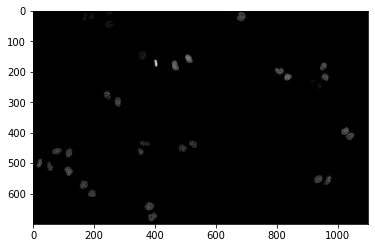

In [6]:
#Output of question 1
image_I = cv2.imread('./t001.tif')
image_O = normalize(image_I)
plt.imshow(image_O)


In [5]:
#Fuction of question 2
def intensity_histogram(img):
    intensity_dict = {}
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if img[x,y][0] not in intensity_dict.keys():
                intensity_dict[img[x,y][0]] = 1
            else:
                intensity_dict[img[x,y][0]]+= 1
    return intensity_dict

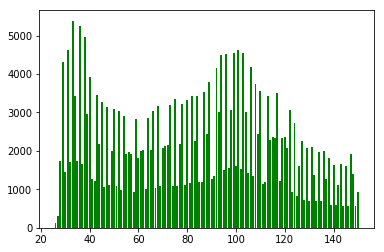

In [6]:
#Output of question 2
intensity_dict = intensity_histogram(image_I)
plt.bar([_ for _ in intensity_dict.keys()],[_ for _ in intensity_dict.values()], color='g') 
plt.show() 

In [18]:
#Function of question 3
def edge_x(img):
    x_metrix = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    return cv2.filter2D(img, -1, x_metrix)

def edge_y(img):
    y_metrix = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    return cv2.filter2D(img, -1, y_metrix)

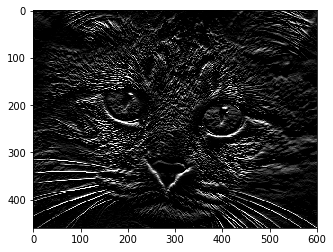

In [20]:
#Output of question 3

plt.imshow(edge_x(image_O))
plt.imshow(edge_y(image_O))

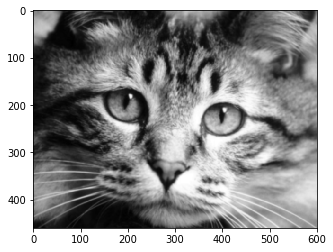

In [11]:
#Question 4
image_I = contrast_stretching(cv2.imread('./cat.png'))
image_L = cv2.GaussianBlur(image_I, (11,11),1.0)
plt.imshow(image_L)

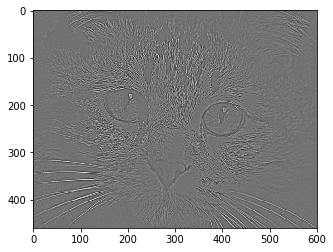

In [12]:
image_H = contrast_stretching(image_I.astype(np.int32) - image_L.astype(np.int32))
plt.imshow(image_H)

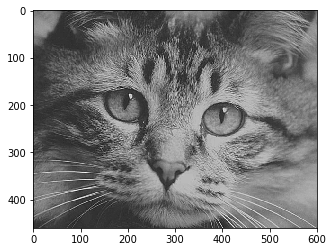

In [13]:
image_O = contrast_stretching(image_I.astype(np.int32) + image_H.astype(np.int32)*1.25)
plt.imshow(image_O)

In [16]:
cv2.imwrite('Question4.jpg', image_O)

True